# Mini-project 1: WARMUP - A dataset with CSV and JSON

In this mini-project, we will generate a fake dataset to warmup with dictionaries, functional programming, and the following libraries: `csv`, `json`, `itertools`, `numpy` and `matplotlib`.

## 1. Generate composed names
### 1.1. Generate a regular list with a regular function 

Write a custom function `generate_composed_names` that returns a list of permutations to create fake composed names separated by a dash, e.g. `Alice-Maria`. 

Be careful:
* The function has 1 input parameter: a list of first names ; and returns the list of permutations with a "-" in-between
* The output list must also include the opposite, e.g. `Alice-Maria` and also `Maria-Alice`
* The output list must not contain repetitions, e.g. `Bob-Bob` (this is a permutation, not a product)

Although Python has tools to do this in some modules, it is a good exercise to start from an exmpty list and fill it progressively with functions we know.

In [1]:
def generate_composed_names(names: list[str]) -> list[str]:
    output = []
    for name in names:
        for name2 in names:
            if name != name2:
                output.append(name + "-" + name2)
    return output

Here is a list of 11 first names
```
names = ["Bob", "Alice", "Maria", "Albert", "Paul", "Alex", "Luc", "Robert", "Dylan", "Léa", "Richard"]
```
The function call with this list must return exactly 110 composed names (i.e. the exact number of permutations w/o repetition of 11 elements) stored in a variables named `composed_names`.

In [2]:
names = ["Bob", "Alice", "Maria", "Albert", "Paul", "Alex", "Luc", "Robert", "Dylan", "Léa", "Richard"]
composed_names = generate_composed_names(names)

In [3]:
len(composed_names), composed_names[0]

(110, 'Bob-Alice')

### 1.2. Use an existing iterator from `itertools`

**First**, make a few tests of use of `itertools.permutations` with input lists of integers. [Read the documentation](https://docs.python.org/3/library/itertools.html).
- What is the type of the return value?
- Cast it in list to get a regular list

In [4]:
from itertools import permutations

type(permutations([1, 2, 3], 2)), list(permutations([1, 2, 3], 2))

(itertools.permutations, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)])

Now implement a regular function `generate_composed_names_from_permutations(...)` that makes use of `itertools.permutations` in its body. Make sure your final output is a list of 110 strings.

In [5]:
from itertools import permutations
def generate_composed_names_from_permutations(names: list[str]) -> list[str]:
    output = []
    for a, b in permutations(names, 2):
        output.append(a + "-" + b)
    return output

In [6]:
composed_names_from_permutations = generate_composed_names_from_permutations(names)

In [7]:
len(composed_names_from_permutations), composed_names_from_permutations[0]

(110, 'Bob-Alice')

### 1.3. Performance comparison

Use the following to benchmark your functions:
- **Time complexity**: the magic `%%timeit` at the beginning of a cell to repeat it and get its average duration of execution
- **Space complexity**: call `sys.getsizeof(x)` to get the memory used by a literal `x` (in Bytes)

Compare the time and space complexities of the call to the functions above. 

In [8]:
names = ["Bob", "Alice", "Maria", "Albert", "Paul", "Alex", "Luc", "Robert", "Dylan", "Léa", "Richard"]

In [9]:
%%timeit
composed_names = generate_composed_names(names)

15.2 µs ± 285 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
%%timeit
composed_names_from_permutations = generate_composed_names_from_permutations(names)

18.3 µs ± 838 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
import sys
sys.getsizeof(composed_names)

1080

In [12]:
import sys
sys.getsizeof(composed_names_from_permutations)

1080

Did you save any performance by using the iterator this way? And why?

**Explanation:** we save no time and no space because even though we have use an iterator to build the second list, it is still a list and has though the same cost as a regular list.

We can even notice a little overhead in time due to the construction of the iterator. Let's have a better use of iterators here under.

# 2. Generate characters as full names
We are going to generate full names (first + last names) using different methods again: a generator, an iterator, a  

## 2.1. Define the generation function as a Generator

Write a custom **generator** named `generate_characters_gen(...)` that returns a list of combinations of composed names and last names separated by a space, e.g. `Paul-Robert Loiseau`.

Recall that a generator is a function that uses the `yield` keyword.

Be careful:
* The function has 2 input parameters: a list of composed first names and a list of last names ; and returns a list of combinations
* It means that for each last name, we will insert in the resulting list as many characters as there are names in the list of first names
* Your list must be in this order: **first name and then last name**, thus it must not contain `Tournesol Paul-Alex` for instance.

In [13]:
def generate_characters_gen(names: list[str], surnames: list[str]) -> list[str]:
    for name in names:
        for surname in surnames:
            yield name + " " + surname

## 2.2. Call and iterate over the generator

Here is a list of 11 last names (from the stories of Tintin):
```
surnames = ["Dupont", "Dupond", "Haddock", "Tournesol", "Castafiore", "Lampion", "Lopez", "Loiseau", "Müller", "Sanzot"]
```

Call your generator and iterate over it with a regular `for` loop displaying `f"Character {i} is named {character}"` each line

In [14]:
surnames = ["Dupont", "Dupond", "Haddock", "Tournesol", "Castafiore", "Lampion", "Lopez", "Loiseau", "Müller", "Sanzot"]

characters = generate_characters_gen(composed_names, surnames)

Observe the return type of the function call and discuss about the difference with an iterator.

In [15]:
type(characters)

# A generator is identical to an iterator, but it is a function, not a class
# However observe that this function has a __iter__ attribute (so it is an iterable) and a __next__ attribute (so it is an iterator).

generator

In a loop, iterate over the generator to print the string `f"Character {i} is named {character}"` for every full name.

In [16]:
for i, character in enumerate(characters):
    print(f"Character {i} is named {character}")

Character 0 is named Bob-Alice Dupont
Character 1 is named Bob-Alice Dupond
Character 2 is named Bob-Alice Haddock
Character 3 is named Bob-Alice Tournesol
Character 4 is named Bob-Alice Castafiore
Character 5 is named Bob-Alice Lampion
Character 6 is named Bob-Alice Lopez
Character 7 is named Bob-Alice Loiseau
Character 8 is named Bob-Alice Müller
Character 9 is named Bob-Alice Sanzot
Character 10 is named Bob-Maria Dupont
Character 11 is named Bob-Maria Dupond
Character 12 is named Bob-Maria Haddock
Character 13 is named Bob-Maria Tournesol
Character 14 is named Bob-Maria Castafiore
Character 15 is named Bob-Maria Lampion
Character 16 is named Bob-Maria Lopez
Character 17 is named Bob-Maria Loiseau
Character 18 is named Bob-Maria Müller
Character 19 is named Bob-Maria Sanzot
Character 20 is named Bob-Albert Dupont
Character 21 is named Bob-Albert Dupond
Character 22 is named Bob-Albert Haddock
Character 23 is named Bob-Albert Tournesol
Character 24 is named Bob-Albert Castafiore
Char

## 2.3. Define the Iterator

Let's write another code to generate the full names again, this time with an  **iterator** named `CharactersIterator`.
Recall that an iterator is a class that implements magic methods `__iter__` and `__next__` 

**Tip:** rely on the existing iterator `itertools.product` to build yours. Your iterator can consume that `product` iterator.

In [17]:
from itertools import product

class CharactersIterator:
    def __init__(self, names: list[str], surnames: list[str]):
        self.characters = product(names, surnames)
    
    def __next__(self):
        next_character = self.characters.__next__()
        return next_character[0] + ' ' + next_character[1]
    
    def __iter__(self):
        return self

## 2.4. Declare and iterate over the iterator

In a loop, iterate over the iterator to print the string `f"Character {i} is named {character}"` for every full name.

In [18]:
characters_iter = CharactersIterator(composed_names, surnames)

In [19]:
for i, character in enumerate(characters_iter):
    print(f"Character {i} is named {character}")

Character 0 is named Bob-Alice Dupont
Character 1 is named Bob-Alice Dupond
Character 2 is named Bob-Alice Haddock
Character 3 is named Bob-Alice Tournesol
Character 4 is named Bob-Alice Castafiore
Character 5 is named Bob-Alice Lampion
Character 6 is named Bob-Alice Lopez
Character 7 is named Bob-Alice Loiseau
Character 8 is named Bob-Alice Müller
Character 9 is named Bob-Alice Sanzot
Character 10 is named Bob-Maria Dupont
Character 11 is named Bob-Maria Dupond
Character 12 is named Bob-Maria Haddock
Character 13 is named Bob-Maria Tournesol
Character 14 is named Bob-Maria Castafiore
Character 15 is named Bob-Maria Lampion
Character 16 is named Bob-Maria Lopez
Character 17 is named Bob-Maria Loiseau
Character 18 is named Bob-Maria Müller
Character 19 is named Bob-Maria Sanzot
Character 20 is named Bob-Albert Dupont
Character 21 is named Bob-Albert Dupond
Character 22 is named Bob-Albert Haddock
Character 23 is named Bob-Albert Tournesol
Character 24 is named Bob-Albert Castafiore
Char

## 2.5. Define a regular function

Finally, write a regular function `generate_characters_func` that returns a regular list of the full names by making no use of iterators or generators.

In [20]:
def generate_characters_func(names: list[str], surnames: list[str]) -> list[str]:
    output = []
    for name in names:
        for surname in surnames:
            output.append(name + " " + surname)
    return output

## 2.6 Performance comparison

You have already consumed both the iterator and generator with your prints. Since you cannot rewind them, we have to call them again to get new ones.

Assign the following outputs to variables:
- Assign the generator call to `characters_gen` (of type `generator`)
- Assign the iterator instanciation to `characters_iter` (of type `iterator`)
- Assign the output of the function call to `characters_func` (of type `list`)

In [21]:
characters_gen = generate_characters_gen(composed_names, surnames)
characters_iter = CharactersIterator(composed_names, surnames)
characters_func = generate_characters_func(composed_names, surnames)

Now benchmark the **time complexity** of these 3 assignments

In [22]:
%%timeit
characters_gen = generate_characters_gen(names, surnames)

269 ns ± 18.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [23]:
%%timeit
characters_iter = CharactersIterator(names, surnames)

586 ns ± 165 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [24]:
%%timeit
characters_func = generate_characters_func(names, surnames)

16.6 µs ± 218 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Benchmark also the **space complexity** of these 3 literals:

In [25]:
sys.getsizeof(characters_gen)

112

In [26]:
sys.getsizeof(characters_func)

8856

In [27]:
sys.getsizeof(characters_iter)

48

Interpret the results in terms of time and space complexity

**Explanation:**
- Only the function call generates the actual data, and this generation has a CPU cost. Both iterator and generator have a low CPU cost because they do not generate the data at these step, the CPU cost will be paid later, splitted in tiny costs every time `next()` will be called.
- Only the function returns an actual list with all data in memory, so its space cost is high. Both iterator and generator just store the way to generate the data, and that does not need much space

In [28]:
characters = characters_func   # Assign the final list of full names for the next part of the exercise

# 3. Import data from a CSV file

We will associate to these characters exam marks generated by another program in a CSV file.
Use the documentation of the [`csv`](https://docs.python.org/3/library/csv.html) module for the next questions:

## 3.1. Load the file

Manually download the file [`exams.csv`](https://raw.githubusercontent.com/ymollard/python-advanced-slides/main/exercises/data/exams.csv?token=AAZEO6XULYU2ZIIZJLGSD4DBVANQC). With Python, open it, load its content, and transform-it in order to get marks by discipline, for instance `math_marks = [15, 13...]`

In [29]:
# My code loading the CSV and displaying the means and std per discipline [...]

In [30]:
import csv

french_marks = []
math_marks = []
philo_marks = []

with open("/tmp/exams.csv") as f:
    reader = csv.reader(f, delimiter=',')
    for i, line in enumerate(reader):
        if i != 0:  # Skip the first line (column headers)
            french_marks.append(float(line[0]))
            math_marks.append(float(line[1]))
            philo_marks.append(float(line[2]))

Install the numerical module `numpy` with pip in your venv (in the PyCharm system terminal).

Use functions `numpy.mean()` et `numy.std()` to get the mean and the standard deviation of marks by discipline

In [31]:
import numpy
numpy.mean(french_marks), numpy.mean(math_marks), numpy.mean(philo_marks)

(10.310045662100457, 11.94337899543379, 8.564383561643835)

In [32]:
numpy.std(french_marks), numpy.std(math_marks), numpy.std(philo_marks)

(3.4584275332123386, 4.764354853163725, 4.495478292309369)

## 3.2. Plot the density of marks

A density plot shows, for each of the 40 possible notes in the horizontal axis (from 0 to 20 with a 0.5 step), the number of occurences of this mark, on the vertical axis. This is a way to check how data are distributed. We could build this plot by hand but popular Python libraries do it for us. 

Install the statistical module `pandas`, the plot module `matplotlib` and the scientific module `scipy` with pip in your venv (in the PyCharm system terminal).

Use [pandas.DataFrame.plot.density](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html) to plot the density of marks.

In [33]:
# Plot the density here [...]

<AxesSubplot: ylabel='Density'>

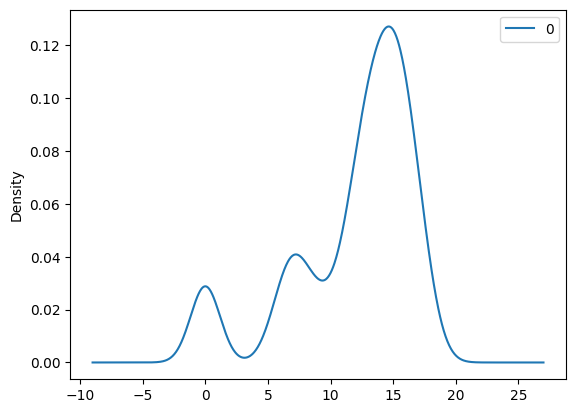

In [34]:
import pandas
frame = pandas.DataFrame(math_marks)
frame.plot.density()

# 4. Produce a new dataset
## 4.1. Build the new data structure 
Transform the data you read in a data structure made of nested dictionaries and/or lists.

The structure must represtent the name of students as well as their marks to the 3 exams

For instance:
```
{
  "Alice-Maria Lampion" : {"math": 15, "french": 10, "philosophy": 11.5},
  "Paul-Alex Loiseau" : {"math": 8.5, "french": 17, "philosophy": 15},
  ...
}
```


In [35]:
# My code creating the data structure here [...]

In [36]:
dataset = {}
for i_full_name, full_name in enumerate(characters):
    try:
        dataset[full_name] = {
            "math": math_marks[i_full_name],
            "french": french_marks[i_full_name],
            "philosophy": philo_marks[i_full_name]
        }
    except IndexError:
        # If we miss marks from the CSV, IndexError will be raised, in that case stop and keep the dataset built so far
        break

## 4.2. Save you data structure in JSON

Import module `json` and use `json.dump()` to save your database un a file: `dataset.json`

Protip: add the paramter `indent=4` in order to make your JSON file readable by a human with a simple text editor. Open the file without Python to observer.

In [37]:
# My code saving the data structure in JSON here []

In [38]:
import json
with open("./dataset.json", "w") as f:
    json.dump(dataset, f)

## 4.3. Read and check

We are now going to check that we can load properly the JSON file with `json.load()`.

We will first crash voluntarily this Jupyter Notebook in order to start from scratch. Your code will remain in your browser but all variables will be lost.

In [39]:
# We volontarily end the interpreter here to make sure all previous variables are cleared up.
import os
os._exit(0)

Now re-load the JSON file into a Python variable and consult the math mark of Paul-Robert Müller :

In [40]:
# My code loading the saved JSON dataset here [...]

In [41]:
import json
with open("./dataset.json") as f:
    dataset = json.load(f)

In [42]:
print("Here is a mark coming from the loaded JSON:", dataset["Paul-Robert Müller"]["math"])

Here is a mark coming from the loaded JSON: 6.0


# Resources

* itertools: https://docs.python.org/3/library/itertools.html
* Functional programming: https://docs.python.org/3/howto/functional.html
* csv: https://docs.python.org/3/library/csv.html
* json: https://docs.python.org/fr/3/library/json.html
* pandas: https://pandas.pydata.org/pandas-docs/stable/

